In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from sklearn.model_selection import train_test_split
plt.style.use("seaborn-whitegrid")

In [6]:
# The dataset insurance involves predicting the total payment(Y) for all the claims 
# given the total number of claims (X).
# Linear regression y = b0 + b1 * x to predict the total payment

df = pd.read_csv("./data/insurance.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


Text(0,0.5,'Total payment')

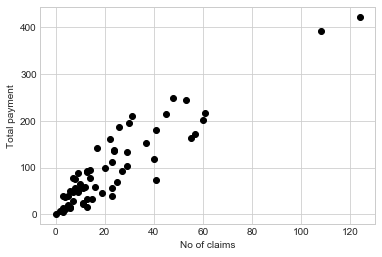

In [45]:
plt.plot(df.X, df.Y, 'o', color='black')
plt.xlabel('No of claims')
plt.ylabel('Total payment')

In [80]:
# split the data into training and test set

train_x,test_x,train_y,test_y = train_test_split(df.X,df.Y,test_size=0.2)


36    61
11    48
24    29
43    37
34    22
Name: X, dtype: int64

In [73]:
# Calculate the mean value of a list of numbers

def mean(values):
    return np.sum(values) / len(values)

# Calculate the variance of a list of numbers

def variance(values, mean):
    var = 0
    for x in values:
        var += (x - mean)**2
    return var

mean_x, mean_y = mean(train_x), mean(train_y)
var_x, var_y = variance(train_x, mean_x), variance(train_y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))

x stats: mean=23.580 variance=29876.180
y stats: mean=102.296 variance=432694.819


In [83]:
# Calculate covariance
# The covariance of two groups of numbers describes how those numbers change together

def covariance(x, x_mean, y, y_mean):
    covar=0.0
    for i,j in zip(x,y):
        covar += (i - x_mean) * (j - y_mean)
    return covar

covar = covariance(train_x, mean_x, train_y, mean_y)
print('Covariance: %.3f' % (covar))

Covariance: 50096.918


In [95]:
# Calculate regression co-efficients
# B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
# B1 = covariance(x,y)/variance(x)
# B0 = mean(y) - B1 * mean(x)

def estimate_coefficients(x,y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean)/ variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return[b0,b1]

b0, b1 = estimate_coefficients(train_x, train_y)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))


Coefficients: B0=17.900, B1=3.461


Text(0.5,1,'Regression line on training set')

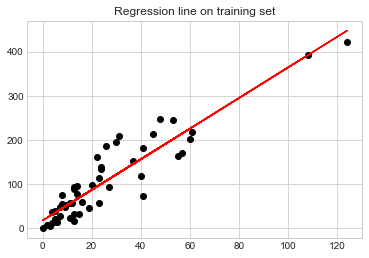

In [98]:
plt.plot(x_train, y_train, 'o', color='black')
plt.plot(x_train, b0+x_train*b1, 'r')
plt.title("Regression line on training set")

In [99]:
# Simple linear regression algorithm

def linear_regression(x_train, y_train, x_test):
    predictions=list()
    b0, b1=estimate_coefficients(x_train, y_train)
    for row in x_test:
        yhat= b0 + b1 * row
        predictions.append(yhat)
    return predictions

predicted = linear_regression(train_x,train_y,test_x)

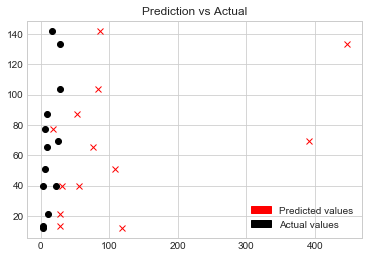

In [106]:
plt.plot(x_test, y_test, 'o', color='black')
plt.plot(predicted, y_test, 'x', color='red')
plt.title("Prediction vs Actual")
red_patch = mpatches.Patch(color='red', label='Predicted values')
black_patch = mpatches.Patch(color='black', label='Actual values')
plt.legend(loc=0,handles=[red_patch, black_patch])

In [94]:
# Calculate root mean squared error

def rmse_matric(actual, predicted):
    sum_error = 0.0
    for i,j in zip(actual,predicted):
        prediction_error = j - i
        sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
    return np.sqrt(mean_error)

rmse = rmse_matric(test_y, predicted)

print('RMSE: %.3f' % (rmse))

RMSE: 34.431
